# Step 1: Reading and Understanding the Data

In [343]:

# Supress Warnings

import warnings
warnings.filterwarnings('ignore')


In [344]:
# Importing all required packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing all the required sklearn packages in advance

from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score


In [345]:
# Reading & checking the data from csv file

bike = pd.read_csv('day.csv')
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [346]:

# Printing the shape of the dataset

print(bike.shape)


(730, 16)


In [347]:
# Checking the info of the dataset.

bike.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [348]:

# From the information we can see that there are no null values present in the dataset.


In [349]:
# Checking the descripition of the dataset

bike.describe()


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [350]:
# Checking all the columns present in the dataset.

bike.columns


Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [351]:
# Checking the data types of all the columns.

bike.dtypes


instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [352]:
# Lets start this step by dropping the unwanted columns.

#Lets check the dataset once again.


In [353]:
bike.head()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [354]:
# Droping instant column 

bike.drop(['instant'], axis = 1, inplace = True)


# Dropping dteday 

bike.drop(['dteday'], axis = 1, inplace = True)



# Dropping casual and registered columns

bike.drop(['casual'], axis = 1, inplace = True)
bike.drop(['registered'], axis = 1, inplace = True)

In [355]:
# instant column is just a row instance so it can be removed.

# dteday is removed as we have other columns like mnth, year and the weekday already to use.

# casual and registered columns are removed as we have cnt column which is sum of the both and also that is the target column.


In [356]:
# Lets check the dataset again to confirm.

bike.head()


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [357]:
# Lets rename few columns for better understanding and check it.

bike.rename(columns={'yr':'year','mnth':'month','hum':'humidity'}, inplace=True)
bike.head()


,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [358]:
# Lets rename the variables in the season column

bike.season = bike.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})


In [359]:
# Lets rename the variables in the month column

bike.month = bike.month.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})


In [360]:
# Lets rename the variables in the weekday column

bike.weekday = bike.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})


In [361]:
# Lets rename the variables in the weathersit column

bike.weathersit = bike.weathersit.map({1:'Clear',2:'Misty',3:'Light_snowrain',4:'Heavy_snowrain'})


In [362]:

# Lets check the data again.

bike.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,0,jan,0,mon,1,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,tue,1,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,thu,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [363]:

# As we can see, the data is more readable and understandble 


# Step 2: Visualising the Data

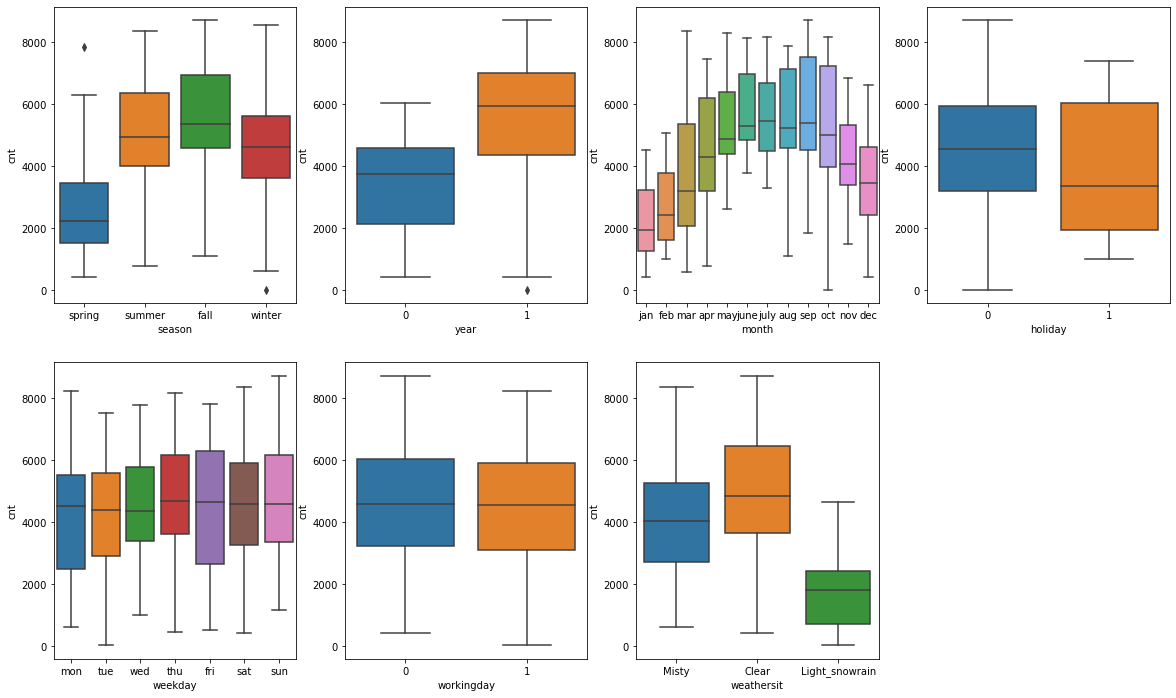

In [364]:
# Visualizing the categorical columns to see how predictor variable stands against the target variable

plt.figure(figsize=(20, 12))

plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike)

plt.subplot(2,4,2)
sns.boxplot(x = 'year', y = 'cnt', data = bike)

plt.subplot(2,4,3)
sns.boxplot(x = 'month', y = 'cnt', data = bike)

plt.subplot(2,4,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike)

plt.subplot(2,4,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike)

plt.subplot(2,4,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike)

plt.subplot(2,4,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike)

plt.show()


<Figure size 1080x2160 with 0 Axes>

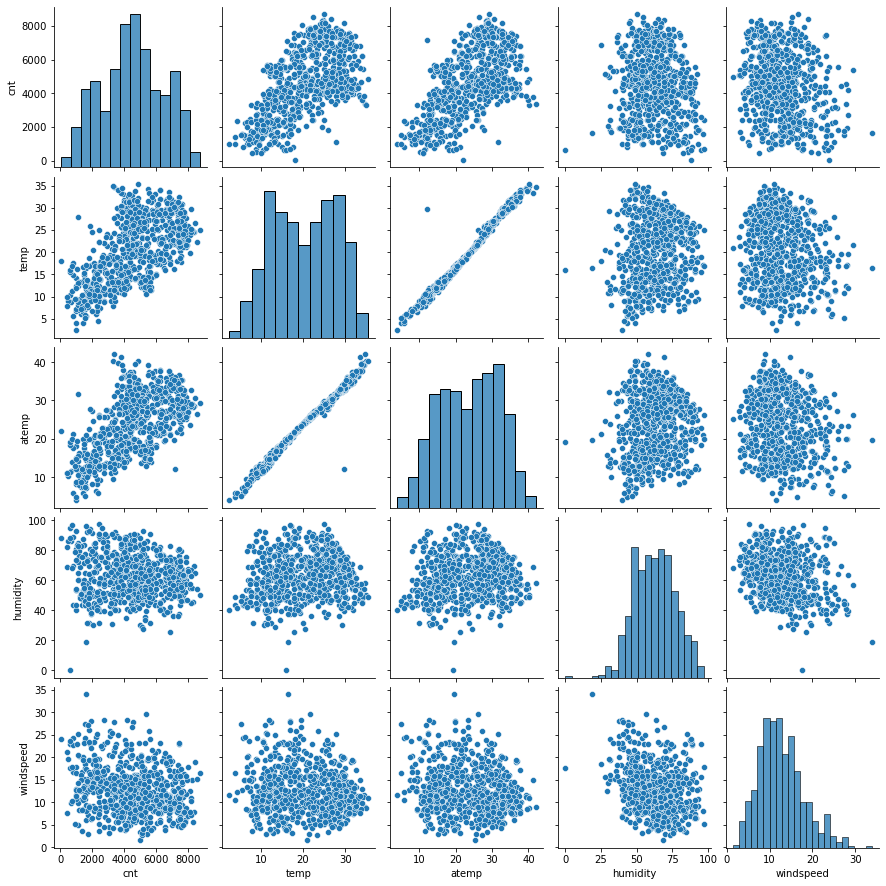

In [365]:

# Pairplots for continuous numeric variables

plt.figure(figsize = (15,30))
sns.pairplot(data=bike,vars=['cnt', 'temp', 'atemp', 'humidity','windspeed'])
plt.show()


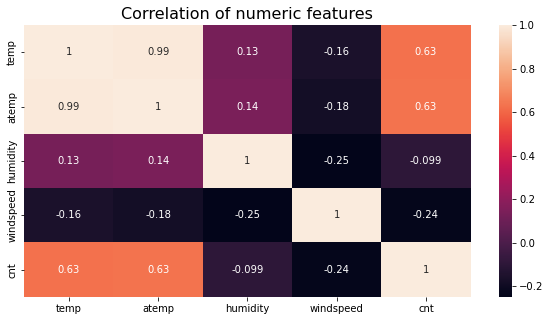

In [366]:
# Correlations for numeric variables

num_features = ["temp","atemp","humidity","windspeed","cnt"]
plt.figure(figsize=(10,5))
plt.title("Correlation of numeric features",fontsize=16)
sns.heatmap(bike[num_features].corr(),annot= True)
plt.show()


In [367]:

# As we can get to know that the variables atemp and temp are highly correlated.


In [368]:

# Lets see how much does the target variable(cnt) affect the variables Temp & Humidity.


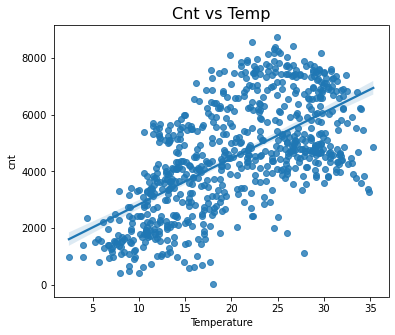

In [369]:

plt.figure(figsize=(6,5))
plt.title("Cnt vs Temp",fontsize=16)
sns.regplot(data=bike,y="cnt",x="temp")
plt.xlabel("Temperature")
plt.show()


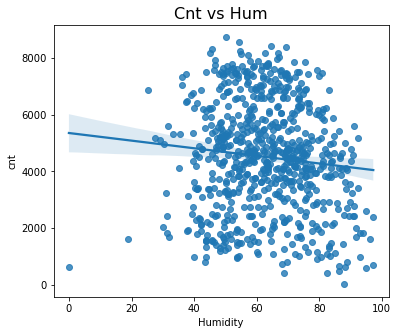

In [370]:

plt.figure(figsize=(6,5))
plt.title("Cnt vs Hum",fontsize=16)
sns.regplot(data=bike,y="cnt",x="humidity")
plt.xlabel("Humidity")
plt.show()

### Boxplots 

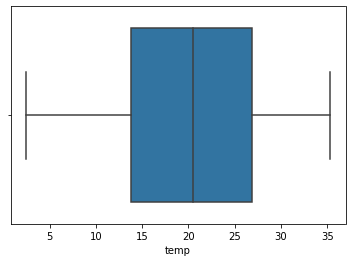

In [371]:
# Boxplot for the variable temp

sns.boxplot(bike['temp'])
plt.show()


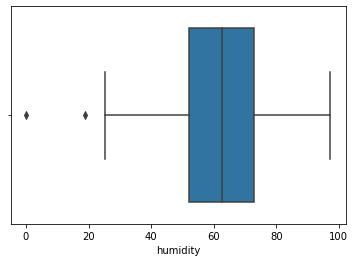

In [372]:
# Boxplot for the variable humidity

sns.boxplot(bike['humidity'])
plt.show()


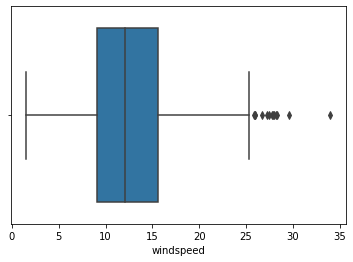

In [373]:
# Boxplot for the variable windspeed

sns.boxplot(bike['windspeed'])
plt.show()


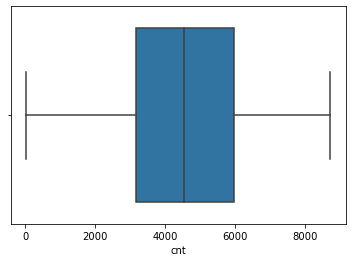

In [374]:
# Boxplot for the target variable cnt

sns.boxplot(bike['cnt'])
plt.show()


### Distplots


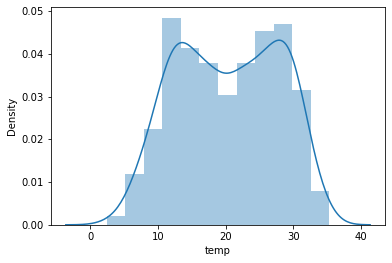

In [375]:
sns.distplot(bike['temp'])
plt.show()

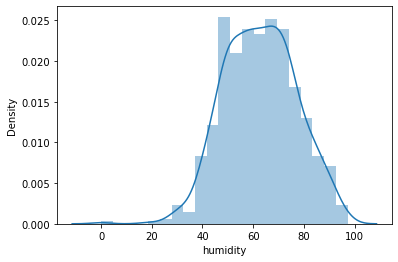

In [376]:
sns.distplot(bike['humidity'])
plt.show()

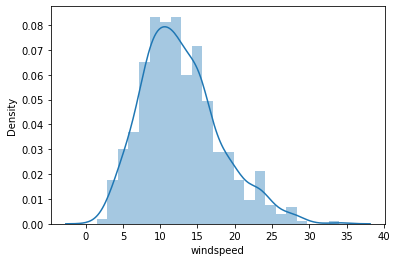

In [377]:
sns.distplot(bike['windspeed'])
plt.show()

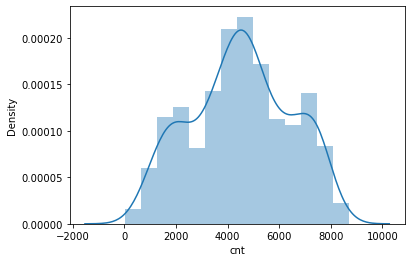

In [378]:
sns.distplot(bike['cnt'])
plt.show()

# Step 3: Data Preparation

In [379]:
# Creating dummy variable for month, weekday, weathersit and season variables.

months_df=pd.get_dummies(bike.month,drop_first=True)
weekdays_df=pd.get_dummies(bike.weekday,drop_first=True)
weathersit_df=pd.get_dummies(bike.weathersit,drop_first=True)
seasons_df=pd.get_dummies(bike.season,drop_first=True)


In [380]:
bike.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,0,jan,0,mon,1,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,tue,1,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,thu,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [381]:
# Now lets merge all the data (Dummies and the original)

bike_df = pd.concat([bike,months_df,weekdays_df,weathersit_df,seasons_df],axis=1)
bike_df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
0,spring,0,jan,0,mon,1,Misty,14.110847,18.18125,80.5833,...,0,0,0,0,0,0,1,1,0,0
1,spring,0,jan,0,tue,1,Misty,14.902598,17.68695,69.6087,...,0,0,0,1,0,0,1,1,0,0
2,spring,0,jan,0,wed,1,Clear,8.050924,9.47025,43.7273,...,0,0,0,0,1,0,0,1,0,0
3,spring,0,jan,0,thu,1,Clear,8.200000,10.60610,59.0435,...,0,0,1,0,0,0,0,1,0,0
4,spring,0,jan,0,fri,1,Clear,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,1,0,0


In [382]:
# All the info about the new dataset

bike_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   season          730 non-null    object 
 1   year            730 non-null    int64  
 2   month           730 non-null    object 
 3   holiday         730 non-null    int64  
 4   weekday         730 non-null    object 
 5   workingday      730 non-null    int64  
 6   weathersit      730 non-null    object 
 7   temp            730 non-null    float64
 8   atemp           730 non-null    float64
 9   humidity        730 non-null    float64
 10  windspeed       730 non-null    float64
 11  cnt             730 non-null    int64  
 12  aug             730 non-null    uint8  
 13  dec             730 non-null    uint8  
 14  feb             730 non-null    uint8  
 15  jan             730 non-null    uint8  
 16  july            730 non-null    uint8  
 17  june            730 non-null    uin

In [383]:
# Lets see all the column names.

bike_df.columns

Index(['season', 'year', 'month', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'humidity', 'windspeed', 'cnt', 'aug',
       'dec', 'feb', 'jan', 'july', 'june', 'mar', 'may', 'nov', 'oct', 'sep',
       'mon', 'sat', 'sun', 'thu', 'tue', 'wed', 'Light_snowrain', 'Misty',
       'spring', 'summer', 'winter'],
      dtype='object')

In [384]:
# dropping unnecessary columns as we have already created dummy variable out of it.

bike_df.drop(['season','month','weekday','weathersit'], axis = 1, inplace = True)


In [385]:
# check the shape of new dataframe

bike_df.shape

(730, 30)

In [386]:
# check the column info of new dataframe 

bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            730 non-null    int64  
 1   holiday         730 non-null    int64  
 2   workingday      730 non-null    int64  
 3   temp            730 non-null    float64
 4   atemp           730 non-null    float64
 5   humidity        730 non-null    float64
 6   windspeed       730 non-null    float64
 7   cnt             730 non-null    int64  
 8   aug             730 non-null    uint8  
 9   dec             730 non-null    uint8  
 10  feb             730 non-null    uint8  
 11  jan             730 non-null    uint8  
 12  july            730 non-null    uint8  
 13  june            730 non-null    uint8  
 14  mar             730 non-null    uint8  
 15  may             730 non-null    uint8  
 16  nov             730 non-null    uint8  
 17  oct             730 non-null    uin


# Step 4: Splitting the Data into Training and Testing Sets

The first basic step for regression is performing a train-test split.

In [387]:
# splitting the dataframe into Train and Test

np.random.seed(0)
df_train, df_test = train_test_split(bike_df, train_size = 0.7, random_state = 100)

In [388]:

# Now lets check & print the shape of both the train and the test .

print(bike_df.shape)
print(df_train.shape)
print(df_test.shape)


(730, 30)
(510, 30)
(220, 30)


In [389]:
# Using MinMaxScaler to Rescaling the features

scaler = MinMaxScaler()


In [390]:
# It is always a good measure to check the dataset.

df_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,0,...,0,0,0,0,1,0,0,0,0,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,0,0,...,0,1,0,0,0,0,1,1,0,0
728,1,0,1,10.489153,11.5850,48.3333,23.500518,1796,0,1,...,0,0,0,0,0,0,0,1,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,0,0,...,0,1,0,0,0,0,1,0,1,0
111,0,0,0,13.803347,16.0977,72.9583,14.707907,1683,0,0,...,0,1,0,0,0,0,1,0,1,0


In [391]:

# Apply scaler to all the columns except for the 'yes-no' and 'dummy' variables

num_vars = ['temp','atemp','humidity','windspeed','cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])


In [392]:
# Verifying after appying scaling.

df_train.head()


,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,1,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,0,1,0,0,0,0,1,1,0,0
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096,0,1,...,0,0,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,0,...,0,1,0,0,0,0,1,0,1,0
111,0,0,0,0.345824,0.318819,0.751824,0.380981,0.191095,0,0,...,0,1,0,0,0,0,1,0,1,0


In [393]:
# checking the description 

df_train.describe()


,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537440,0.513156,0.650480,0.320883,0.513499,0.096078,0.084314,...,0.129412,0.137255,0.143137,0.152941,0.135294,0.029412,0.345098,0.243137,0.247059,0.247059
std,0.500429,0.157763,0.453386,0.225858,0.212410,0.145846,0.169803,0.224421,0.294988,0.278131,...,0.335985,0.344454,0.350557,0.360284,0.342373,0.169124,0.475867,0.429398,0.431725,0.431725
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


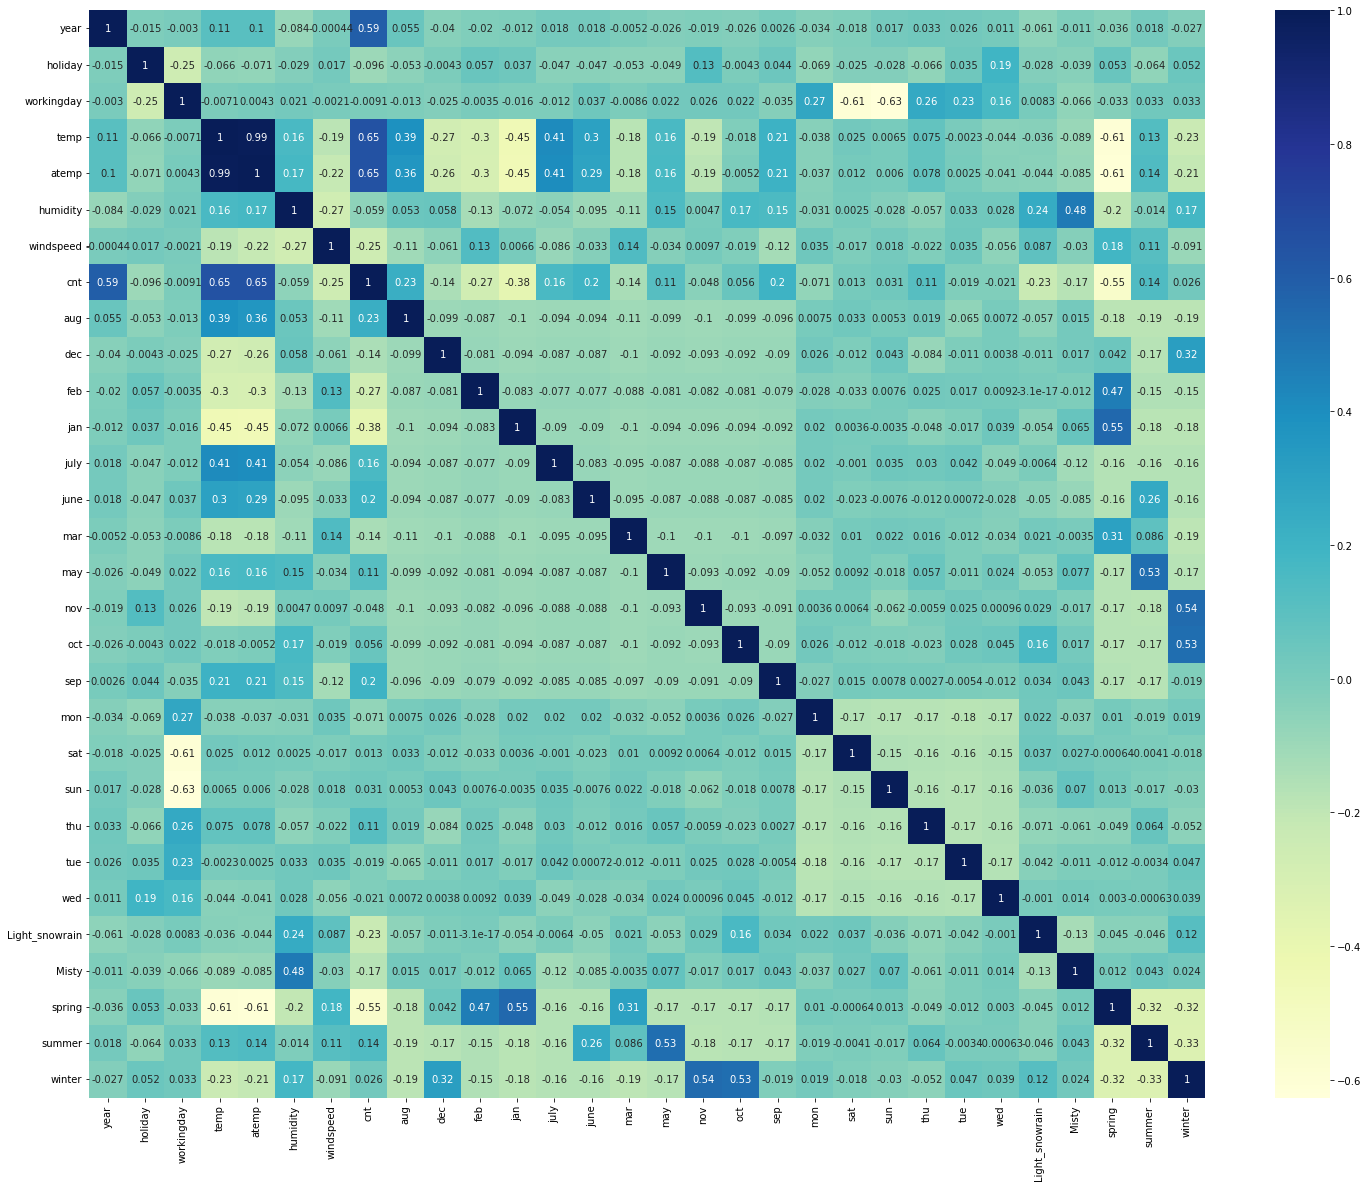

In [394]:

# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (25, 20))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()


##### From the above heatmap, we can figure out that variable cnt seems to have correlation with the year, temp & atemp.


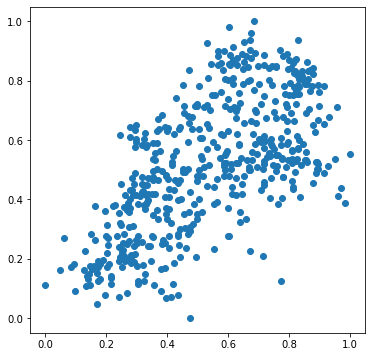

In [395]:
# Now because of the correlation, we can plot a pairplot 

plt.figure(figsize=[6,6])
plt.scatter(df_train.temp, df_train.cnt)
plt.show()


### Dividing into X and Y sets for the model building


In [396]:

# Building the Linear Model

y_train = df_train.pop('cnt')
X_train = df_train


In [397]:
# Recursive feature elimination 

lm = LinearRegression()
lm.fit(X_train, y_train)


LinearRegression()

In [398]:
rfe = RFE(lm, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)


In [399]:
#List of variables selected in top 15 list

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 4),
 ('temp', True, 1),
 ('atemp', False, 3),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('aug', False, 10),
 ('dec', True, 1),
 ('feb', False, 2),
 ('jan', True, 1),
 ('july', True, 1),
 ('june', False, 12),
 ('mar', False, 15),
 ('may', False, 9),
 ('nov', True, 1),
 ('oct', False, 13),
 ('sep', True, 1),
 ('mon', False, 8),
 ('sat', False, 5),
 ('sun', False, 6),
 ('thu', False, 14),
 ('tue', False, 7),
 ('wed', False, 11),
 ('Light_snowrain', True, 1),
 ('Misty', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1)]

In [400]:
# selecting the selected variable via RFE in col list

col = X_train.columns[rfe.support_]
print(col)

Index(['year', 'holiday', 'temp', 'humidity', 'windspeed', 'dec', 'jan',
       'july', 'nov', 'sep', 'Light_snowrain', 'Misty', 'spring', 'summer',
       'winter'],
      dtype='object')


In [401]:
# checking which columns has been rejected

X_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'aug', 'feb', 'june', 'mar', 'may', 'oct', 'mon',
       'sat', 'sun', 'thu', 'tue', 'wed'],
      dtype='object')

In [402]:
# Check for the VIF values of the feature variables. 

from statsmodels.stats.outliers_influence import variance_inflation_factor


In [403]:
# Generic function to calculate VIF of variables

def calcVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 


In [404]:
# dataframe with RFE selected variables

X_train_rfe = X_train[col]


In [405]:
# calculate VIF

calcVIF(X_train_rfe)

,Features,VIF
3,humidity,30.89
2,temp,17.79
4,windspeed,4.72
12,spring,4.37
14,winter,4.06
13,summer,2.82
11,Misty,2.32
0,year,2.09
8,nov,1.85
6,jan,1.75


In [406]:

# From this we can say that humidity has the highest VIF value


# Step 5: Building a linear model

In [407]:
import statsmodels.api as sm

In [408]:
# Building 1st linear regression model

X_train_lm_1 = sm.add_constant(X_train_rfe)
lr_1 = sm.OLS(y_train,X_train_lm_1).fit()
lr_1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.4
Date:                Tue, 31 Jan 2023   Prob (F-statistic):          8.15e-189
Time:                        21:58:12   Log-Likelihood:                 514.19
No. Observations:                 510   AIC:                            -996.4
Df Residuals:                     494   BIC:                            -928.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3197      0.036      8.859      0.000       0.249       0.391
year               0.2304      0.008     28.487      0.000       0.215       0.246
holiday           -0.0911      0.026     -3.557      0.000      -0.141      -0.041
temp               0.4815      0.037     13.005      0.000       0.409       0.554
humidity          -0.1622      0.038     -4.291      0.000      -0.236      -0.088
windspeed         -0.1887      0.026     -7.315      0.000      -0.239      -0.138
dec               -0.0355      0.018     -2.024      0.043      -0.070      -0.001
jan               -0.0434      0.018     -2.393      0.017      -0.079      -0.008
july              -0.0553      0.018     -3.030      0.003      -0.091      -0.019
nov               -0.0387      0.019     -2.057      0.040      -0.076      -0.002
sep                0.0755      0.017      4.466      0.000       0.042       0.109
Light_snowrain    -0.2465      0.026     -9.331      0.000      -0.298      -0.195
Misty             -0.0543      0.010     -5.194      0.000      -0.075      -0.034
spring            -0.0613      0.021     -2.881      0.004      -0.103      -0.019
summer             0.0423      0.015      2.761      0.006       0.012       0.072
winter             0.1019      0.018      5.656      0.000       0.067       0.137
==============================================================================
Omnibus:                       66.656   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              161.040
Skew:                          -0.682   Prob(JB):                     1.07e-35
Kurtosis:                       5.392   Cond. No.                         20.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [409]:
# As humidity shows high VIF values, hence we can drop it.

X_train_new = X_train_rfe.drop(['humidity'], axis = 1)

# Run the function to calculate VIF for the new model

calcVIF(X_train_new)


,Features,VIF
2,temp,5.17
3,windspeed,4.67
13,winter,2.95
11,spring,2.89
12,summer,2.24
0,year,2.07
7,nov,1.81
5,jan,1.66
6,july,1.59
10,Misty,1.57


In [410]:
# We generally want a VIF that is less than 5. So there are clearly some variables we need to drop.

In [411]:

# Building 2nd linear regression model

X_train_lm_2 = sm.add_constant(X_train_new)
lr_2 = sm.OLS(y_train,X_train_lm_2).fit()
lr_2.summary()
                      

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     184.5
Date:                Tue, 31 Jan 2023   Prob (F-statistic):          4.75e-186
Time:                        21:58:12   Log-Likelihood:                 504.85
No. Observations:                 510   AIC:                            -979.7
Df Residuals:                     495   BIC:                            -916.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2450      0.032      7.618      0.000       0.182       0.308
year               0.2345      0.008     28.687      0.000       0.218       0.251
holiday           -0.0918      0.026     -3.522      0.000      -0.143      -0.041
temp               0.4387      0.036     12.093      0.000       0.367       0.510
windspeed         -0.1585      0.025     -6.276      0.000      -0.208      -0.109
dec               -0.0428      0.018     -2.413      0.016      -0.078      -0.008
jan               -0.0500      0.018     -2.719      0.007      -0.086      -0.014
july              -0.0500      0.019     -2.703      0.007      -0.086      -0.014
nov               -0.0395      0.019     -2.064      0.040      -0.077      -0.002
sep                0.0687      0.017      4.015      0.000       0.035       0.102
Light_snowrain    -0.2917      0.025    -11.840      0.000      -0.340      -0.243
Misty             -0.0801      0.009     -9.198      0.000      -0.097      -0.063
spring            -0.0713      0.021     -3.314      0.001      -0.113      -0.029
summer             0.0349      0.015      2.251      0.025       0.004       0.065
winter             0.0869      0.018      4.831      0.000       0.052       0.122
==============================================================================
Omnibus:                       69.242   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              171.476
Skew:                          -0.698   Prob(JB):                     5.81e-38
Kurtosis:                       5.473   Cond. No.                         18.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [412]:

# We can drop nov variable as it has high p-value
X_train_new = X_train_new.drop(['nov'], axis = 1)


# Run the function to calculate VIF for the new model
calcVIF(X_train_new)


,Features,VIF
2,temp,5.14
3,windspeed,4.62
10,spring,2.89
11,summer,2.24
0,year,2.07
12,winter,2.05
5,jan,1.65
6,july,1.59
9,Misty,1.57
7,sep,1.34


In [413]:
# Building 3rd linear regression model

X_train_lm_3 = sm.add_constant(X_train_new)
lr_3 = sm.OLS(y_train,X_train_lm_3).fit()
lr_3.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.0
Date:                Tue, 31 Jan 2023   Prob (F-statistic):          2.74e-186
Time:                        21:58:12   Log-Likelihood:                 502.67
No. Observations:                 510   AIC:                            -977.3
Df Residuals:                     496   BIC:                            -918.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2283      0.031      7.310      0.000       0.167       0.290
year               0.2343      0.008     28.573      0.000       0.218       0.250
holiday           -0.0982      0.026     -3.783      0.000      -0.149      -0.047
temp               0.4581      0.035     13.031      0.000       0.389       0.527
windspeed         -0.1594      0.025     -6.291      0.000      -0.209      -0.110
dec               -0.0283      0.016     -1.731      0.084      -0.060       0.004
jan               -0.0451      0.018     -2.467      0.014      -0.081      -0.009
july              -0.0499      0.019     -2.686      0.007      -0.086      -0.013
sep                0.0742      0.017      4.373      0.000       0.041       0.108
Light_snowrain    -0.2878      0.025    -11.677      0.000      -0.336      -0.239
Misty             -0.0793      0.009     -9.089      0.000      -0.096      -0.062
spring            -0.0632      0.021     -2.979      0.003      -0.105      -0.022
summer             0.0404      0.015      2.635      0.009       0.010       0.070
winter             0.0774      0.017      4.438      0.000       0.043       0.112
==============================================================================
Omnibus:                       62.961   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              145.773
Skew:                          -0.660   Prob(JB):                     2.22e-32
Kurtosis:                       5.263   Cond. No.                         18.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [414]:

# We can drop dec variable as it has high p-value
X_train_new = X_train_new.drop(['dec'], axis = 1)


# Run the function to calculate VIF for the new model
calcVIF(X_train_new)


,Features,VIF
2,temp,5.13
3,windspeed,4.62
9,spring,2.75
10,summer,2.24
0,year,2.07
11,winter,1.78
4,jan,1.61
5,july,1.59
8,Misty,1.56
6,sep,1.34


In [415]:
# Building 4th linear regression model

X_train_lm_4 = sm.add_constant(X_train_new)
lr_4 = sm.OLS(y_train,X_train_lm_4).fit()
lr_4.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     212.3
Date:                Tue, 31 Jan 2023   Prob (F-statistic):          8.14e-187
Time:                        21:58:13   Log-Likelihood:                 501.13
No. Observations:                 510   AIC:                            -976.3
Df Residuals:                     497   BIC:                            -921.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2154      0.030      7.088      0.000       0.156       0.275
year               0.2343      0.008     28.517      0.000       0.218       0.250
holiday           -0.0968      0.026     -3.722      0.000      -0.148      -0.046
temp               0.4721      0.034     13.772      0.000       0.405       0.539
windspeed         -0.1549      0.025     -6.135      0.000      -0.205      -0.105
jan               -0.0383      0.018     -2.138      0.033      -0.073      -0.003
july              -0.0503      0.019     -2.706      0.007      -0.087      -0.014
sep                0.0764      0.017      4.506      0.000       0.043       0.110
Light_snowrain    -0.2854      0.025    -11.575      0.000      -0.334      -0.237
Misty             -0.0793      0.009     -9.067      0.000      -0.096      -0.062
spring            -0.0617      0.021     -2.905      0.004      -0.103      -0.020
summer             0.0434      0.015      2.845      0.005       0.013       0.073
winter             0.0757      0.017      4.335      0.000       0.041       0.110
==============================================================================
Omnibus:                       59.886   Durbin-Watson:                   2.058
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              135.021
Skew:                          -0.638   Prob(JB):                     4.79e-30
Kurtosis:                       5.174   Cond. No.                         17.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [416]:

# We can drop jan variable as it has high p-value
X_train_new = X_train_new.drop(['jan'], axis = 1)

# Run the function to calculate VIF for the new model
calcVIF(X_train_new)


,Features,VIF
2,temp,5.09
3,windspeed,4.60
9,summer,2.23
8,spring,2.08
0,year,2.07
10,winter,1.78
4,july,1.58
7,Misty,1.55
5,sep,1.34
6,Light_snowrain,1.08


In [417]:
# Building 5th linear regression model

X_train_lm_5 = sm.add_constant(X_train_new)
lr_5 = sm.OLS(y_train,X_train_lm_5).fit()
lr_5.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     229.6
Date:                Tue, 31 Jan 2023   Prob (F-statistic):          5.06e-187
Time:                        21:58:13   Log-Likelihood:                 498.80
No. Observations:                 510   AIC:                            -973.6
Df Residuals:                     498   BIC:                            -922.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1994      0.030      6.746      0.000       0.141       0.258
year               0.2336      0.008     28.352      0.000       0.217       0.250
holiday           -0.0975      0.026     -3.736      0.000      -0.149      -0.046
temp               0.4910      0.033     14.770      0.000       0.426       0.556
windspeed         -0.1479      0.025     -5.887      0.000      -0.197      -0.099
july              -0.0521      0.019     -2.790      0.005      -0.089      -0.015
sep                0.0768      0.017      4.517      0.000       0.043       0.110
Light_snowrain    -0.2842      0.025    -11.487      0.000      -0.333      -0.236
Misty             -0.0802      0.009     -9.146      0.000      -0.097      -0.063
spring            -0.0672      0.021     -3.175      0.002      -0.109      -0.026
summer             0.0465      0.015      3.051      0.002       0.017       0.076
winter             0.0817      0.017      4.730      0.000       0.048       0.116
==============================================================================
Omnibus:                       59.182   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              134.016
Skew:                          -0.629   Prob(JB):                     7.92e-30
Kurtosis:                       5.173   Cond. No.                         17.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [418]:

# We can drop july variable as it has high p-value
X_train_new = X_train_new.drop(['july'], axis = 1)

# Run the function to calculate VIF for the new model
calcVIF(X_train_new)


,Features,VIF
3,windspeed,4.60
2,temp,3.84
0,year,2.07
7,spring,1.99
8,summer,1.90
9,winter,1.63
6,Misty,1.55
4,sep,1.23
5,Light_snowrain,1.08
1,holiday,1.04


In [419]:

# VIF value now seems to be good as it came below 5.


In [420]:
# Building 6th linear regression model

X_train_lm_6 = sm.add_constant(X_train_new)
lr_6 = sm.OLS(y_train,X_train_lm_6).fit()
print(lr_6.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     248.4
Date:                Tue, 31 Jan 2023   Prob (F-statistic):          1.47e-186
Time:                        21:58:13   Log-Likelihood:                 494.84
No. Observations:                 510   AIC:                            -967.7
Df Residuals:                     499   BIC:                            -921.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1909      0.030      6.

# Step 6: Residual Analysis of the train data and validation

In [421]:
# Checking the dataset

X_train_lm_6


,const,year,holiday,temp,windspeed,sep,Light_snowrain,Misty,spring,summer,winter
576,1.0,1,0,0.815169,0.264686,0,0,0,0,0,0
426,1.0,1,0,0.442393,0.255342,0,0,1,1,0,0
728,1.0,1,0,0.245101,0.663106,0,0,0,1,0,0
482,1.0,1,0,0.395666,0.188475,0,0,1,0,1,0
111,1.0,0,0,0.345824,0.380981,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
578,1.0,1,0,0.863973,0.187140,0,0,0,0,0,0
53,1.0,0,0,0.202618,0.111379,0,0,0,1,0,0
350,1.0,0,0,0.248216,0.431816,0,0,1,0,0,1
79,1.0,0,0,0.462664,0.529881,0,0,1,0,1,0


In [422]:
y_train_pred = lr_6.predict(X_train_lm_6)

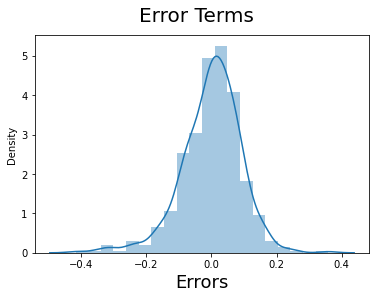

In [423]:
# Plot the histogram of the error terms

fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label
plt.show()

In [424]:

# Lets check the Multi Collinearity


In [425]:
calcVIF(X_train_new)

,Features,VIF
3,windspeed,4.60
2,temp,3.84
0,year,2.07
7,spring,1.99
8,summer,1.90
9,winter,1.63
6,Misty,1.55
4,sep,1.23
5,Light_snowrain,1.08
1,holiday,1.04


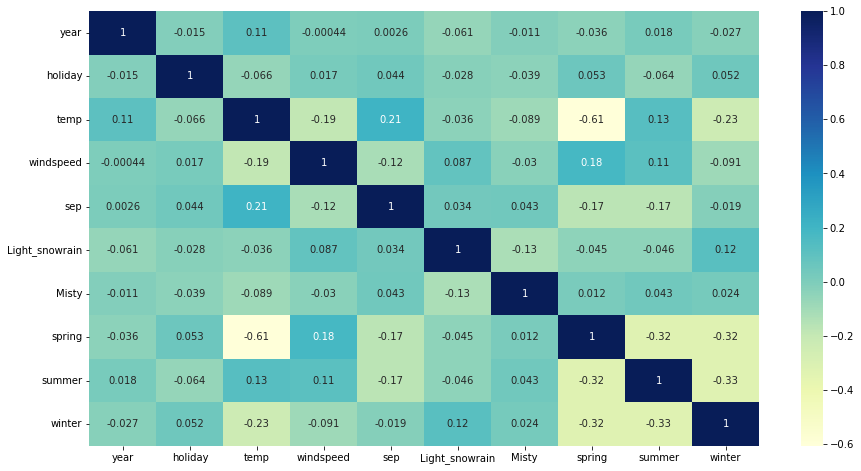

In [426]:

plt.figure(figsize=(15,8))
sns.heatmap(X_train_new.corr(),annot = True, cmap="YlGnBu")
plt.show()


####  This provess that VIF values are less than 5 which is good and also there is no multicollinearity as seen from the heatmap.


# Step 7: Making Predictions Using the Final Model



#### Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. fourth model.

#### Applying the scaling on the test sets

In [427]:


num_vars = ['temp', 'atemp', 'humidity', 'windspeed','cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()


,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,0,0,1,0,1,0,0,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,0,...,0,0,1,0,0,0,0,0,1,0
299,0,0,0,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,1,0,0,0,0,0,1,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,1,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0,0.817246,0.741471,0.314298,0.537414,0.569029,0,0,...,1,0,0,0,0,0,0,0,1,0


#### Dividing into X_test and y_test

In [428]:
y_test = df_test.pop('cnt')
X_test = df_test


In [429]:
col1 = X_train_new.columns

X_test = X_test[col1]


In [430]:
# Adding constant variable to test dataframe

X_test_lm_6 = sm.add_constant(X_test)


In [431]:
y_pred = lr_6.predict(X_test_lm_6)


# Step 8: Model Evaluation

In [432]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8038195990728842

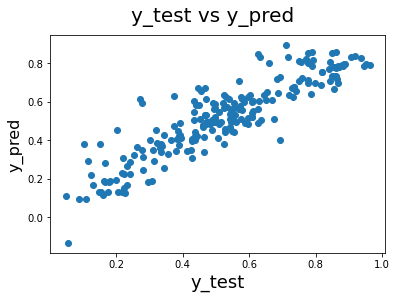

In [433]:
 
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20) 
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16) 
plt.show()


In [434]:
lr_6.params

const             0.190855
year              0.234132
holiday          -0.096316
temp              0.477737
windspeed        -0.148098
sep               0.090998
Light_snowrain   -0.285031
Misty            -0.078741
spring           -0.055406
summer            0.062076
winter            0.094476
dtype: float64

We can say that the equation of our best fitted line is:

cnt = 0.1908 + 0.2341 x year - 0.0963 x holiday + 0.4777 x temp - 0.1480 x windspeed + 0.0909 x sep - 0.2850 x Light_snowrain - 0.0787 x Misty - 0.0554 x spring + 0.0620 x summer + 0.0944 x winter